In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
# Load the Boston Housing dataset
boston = fetch_openml(name='boston', version=1, as_frame=True)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [8]:
type(boston)

sklearn.utils._bunch.Bunch

In [9]:
print(dir(boston))

['DESCR', 'categories', 'data', 'details', 'feature_names', 'frame', 'target', 'target_names', 'url']


In [20]:
boston.data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [21]:
boston.target.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [17]:
# Create a DataFrame from the dataset
boston_df = pd.concat([boston.data, boston.target], axis=1)
boston_df.columns = list(boston.feature_names) + ['target']

In [19]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [24]:
print(boston.feature_names)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [26]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64
             CRIM          ZN       INDUS         NOX          RM         AGE  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.554695    6.284634   68.574901   
std      8.601545   23.322453    6.860353    0.115878    0.702617   28.148861   
min      0.006320    0.000000    0.460000    0.385000    3.561000    2.900000   
25%      0.082045    0.000000    5.190000    0.449000    5.885500   45.025000   
50%      0.256510    0.000000    9.690000    0.538000    6.208500   77.500000   
75%      3.677083   12.500000   18.100000    0.624000    6.623500   94.075000   
max     88.976200  100.000000   27.740000    0.871000    8.780000  100.000000   

              DIS         TAX     PTRATIO           B       LSTAT      targ

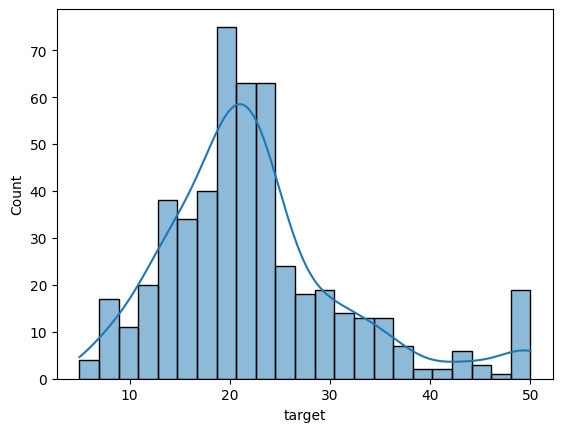

In [18]:
# Explore the data
print(boston_df.isnull().sum())
print(boston_df.describe())
sns.histplot(boston_df['target'], kde=True)
plt.show()

In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(boston_df.drop('target', axis=1), boston_df['target'], test_size=0.2, random_state=42)

In [28]:
# Train a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [29]:
# Evaluate the performance of the model
y_pred = lr.predict(X_test.values)
y_test = y_test.astype(float)  # Convert y_test to a numerical array
print('Linear Regression:')
print('MSE:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Linear Regression:
MSE: 24.291119474973478
R-squared: 0.6687594935356326


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [30]:
# Train a Ridge regression model
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.5)

In [ ]:
# Use the trained model to make predictions on new data
new_data = pd.DataFrame([[0.00632, 18.00, 2.31, 0, 0.538, 6.575, 65.2, 4.0900, 1, 296.0, 15.3, 396.90, 4.98]], columns=boston.feature_names)
print('Predicted price (linear regression):', lr.predict(new_data))
print('Predicted price (Ridge regression):', ridge_reg.predict(new_data))

Predicted price (linear regression): [29.95339638]
Predicted price (Ridge regression): [30.13342164]


In [33]:
# Predict MEDV for new data
new_data = [[0.01, 18.0, 2.0, 0, 0.54, 6.0, 65.2, 4.0, 1, 280.0, 17.0, 396.90, 4.98]]
prediction = lr.predict(new_data)
print('Predicted MEDV:', prediction[0])

Predicted MEDV: 26.098107656480742


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


####

In [35]:
boston_df['MEDV'] = boston.target

In [38]:
correlations = boston_df.corr()['MEDV'].sort_values()
print(correlations)

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
AGE       -0.376955
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
target     1.000000
MEDV       1.000000
Name: MEDV, dtype: float64


<ipython-input-38-09e70d73da27>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = boston_df.corr()['MEDV'].sort_values()


<ipython-input-43-2ec827096128>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = boston_df.corr()


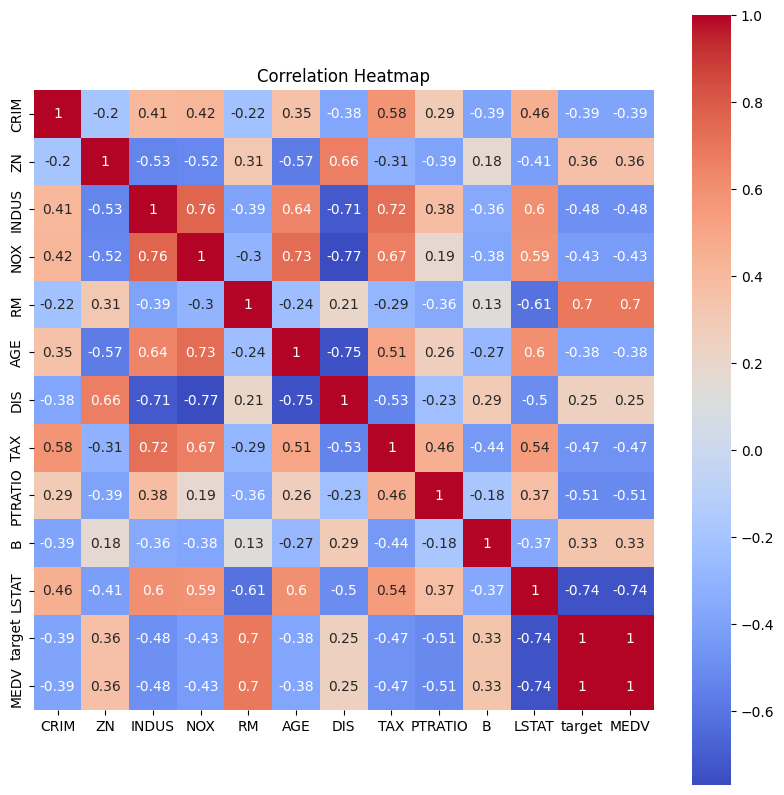

In [43]:
correlations = boston_df.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(correlations, square=True, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()